# Desafio de Regressão Linear

Fazer um modelo de regressão linear para prever o investimento inicial necessário para fazer uma franquia, dada determinada Taxa Anual.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from yellowbrick.regressor import ResidualsPlot

In [3]:
franquiasBase = pd.read_csv('./dados/slr12.csv', sep=';')
franquiasBase.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [4]:
franquiasBase.shape

(36, 2)

Vamos primeiramente ver a linearidade dos dados

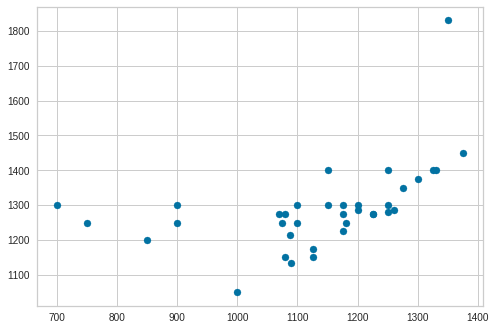

In [15]:
plt.scatter(franquiasBase.iloc[:,0], franquiasBase.iloc[:,1])

In [9]:
X = franquiasBase.iloc[:, 0].values # Iremos usar de variável independente o FrqAnual, que é o valor anual.
y = franquiasBase.iloc[:, 1].values # E de variável dependente, o CustInic, que é o investimento inicial.

Vamos descobrir a correlação dessas variáveis. Com isso saberemos como elas podem ser usadas para previsão

In [10]:
correlaction = np.corrcoef(X, y)
correlaction

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [11]:
# Formataremos X como matrix:
X = X.reshape(-1, 1)
X[:5]

array([[1000],
       [1125],
       [1087],
       [1070],
       [1100]])

Vamos então criar o modelo e então treiná-lo

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
model.intercept_

867.6042222620558

In [16]:
model.coef_

array([0.37315794])

Vamos fazer o gráfico de dispersão e adicionar a linha da regressão:

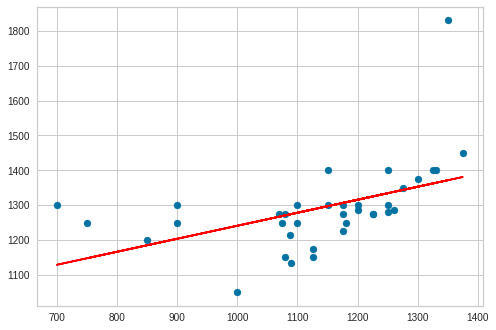

In [28]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel = 'Valor anual de Franquia'
plt.ylabel = 'Investimento inicial'

Vamos então prever!

In [19]:
model.predict([[1223]])

array([1323.9763779])

Agora veremos os residuos que encontramos no modelo:

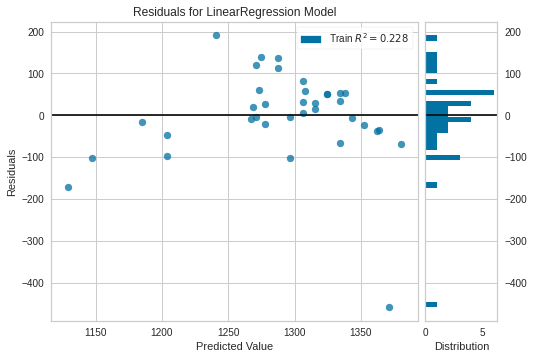

In [30]:
res = ResidualsPlot(model)
res.fit(X, y)
res.poof()
